# Database exploration

In [9]:
from __future__ import annotations

from thefuzz import process
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from recovery_factor import abbrev_to_us_state

plt.style.use("seaborn")

In [2]:
df_atlas = pd.read_excel("../data/2018 Atlas Update.xlsx", engine="openpyxl")
df_atlas.columns

Index(['SN_FORMSAND', 'SAND_NAME', 'ASSESSED', 'SDDATE', 'SDYEAR', 'SDDATEH',
       'SDYEARH', 'WELLAPI', 'BOEM_FIELD', 'FCLASS', 'FSTAT', 'FSTRUC',
       'FTRAP1', 'FTRAP2', 'FDDATE', 'FDYEAR', 'EIAID', 'PLAREA', 'SAND',
       'PLAY_NUM', 'PLAY_NAME', 'POOL_NAME', 'CHRONOZONE', 'PLAY_TYPE',
       'SD_TYPE', 'WDEP', 'Original Oil', 'Original Gas', 'Original BOE',
       'Cum Oil', 'Cum Gas', 'Cum BOE', 'Oil Reserves', 'Gas Reserves',
       'BOE Reserves', 'SS', 'THK', 'TAREA', 'TVOL', 'OTHK', 'OAREA', 'OVOL',
       'GTHK', 'GAREA', 'GVOL', 'DRIVE', 'RESTYP', 'POROSITY', 'SW',
       'PERMEABILITY', 'Pi', 'TI', 'SDPG', 'SDTG', 'RSI', 'YIELD', 'PROP',
       'GOR', 'SPGR', 'API', 'BGI', 'BOI', 'RECO_AF', 'RECG_AF', 'OIP', 'GIP',
       'ORF', 'ORECO', 'ORECG', 'ORP', 'GRF', 'GRECO', 'GRECG', 'GRP', 'NCNT',
       'UCNT', 'SCNT', 'TCNT', 'BHCOMP', 'LAT', 'LONG'],
      dtype='object')

In [ ]:
df_atlas.head(1).T.iloc[:40]

In [3]:
header = pd.read_csv("../data/TORIS-cleaner.csv", header=None, nrows=5, dtype="str")
cols = [" ".join(header[x].dropna()) for x in header]
# cols
df_toris = pd.read_csv("../data/TORIS-cleaner.csv", header=None, names=cols, skiprows=5)
df_toris.head()

,Field Acres,Proven Acres,Well Spacing Acres,Total Wells,Net Pay ft,Gross Pay ft,Porosity percent,"Initial Oil Saturation, %","Current Oil Saturation, %","Initial Water Saturation, %",...,Struct. Compart. Degree of Conf.,Predominant Element of Reservoir Heterogeneity,Trap Type,Geologic Province,State Postal,Lithology Code,Geologic Age Code2,Field Name,Reservoir Name,
0,3200.0,NaN,120.0,51.0,320.0,600.0,14.0,60.0,NaN,40.0,...,1,1,2,67,AK,1,122,GRANITE POINT,MIDDLE KENAI,NaN
1,240000.0,NaN,320.0,114.0,50.0,150.0,21.0,68.0,67.0,32.0,...,1,1,3,58,AK,1,217,KUPARUK RIVER,KUPARUK RIVER,NaN
2,12400.0,NaN,80.0,81.0,290.0,475.0,11.9,65.0,41.0,35.0,...,1,1,2,67,AK,1,123,MCARTHUR RIVER,HEMLOCK,NaN
3,2400.0,NaN,160.0,15.0,100.0,160.0,18.1,65.0,NaN,35.0,...,1,1,2,67,AK,1,123,MCARTHUR RIVER,TYONEK MIDDLE KENAI G ZONE,NaN
4,1515.0,NaN,160.0,6.0,100.0,300.0,15.7,NaN,32.0,52.0,...,1,1,2,67,AK,1,124,MCARTHUR RIVER,WEST FORELAND,NaN


In [4]:
df_repsol = pd.read_csv("../data/Repsol ALL.csv", encoding_errors="replace", skiprows=1)
df_repsol.head()

,DATABASE,IBM_CODE,1. FIELD NAME,1. FIELD NAME [2. RESERVOIR UNIT],2. RESERVOIR UNIT,3. FIELD ALIAS,4. COUNTRY,CODE_COUNTRY,5. STATE,6. REGION,...,172. RECOVERY FACTOR (OIL PRIMARY %),173. RECOVERY FACTOR (OIL SECONDARY %),174. RECOVERY FACTOR (OIL TERTIARY %),175. RECOVERY FACTOR (OIL ULTIMATE %),176. RECOVERY FACTOR (GAS ULTIMATE %),177. RECOVERY FACTOR (CONDENSATE ULTIMATE %),178. WELL SPACING (OIL AVERAGE KM2),179. WELL SPACING (GAS AVERAGE KM2),180. REPORT COMPILATION DATE,181. REPORT CHANGE DATE
0,CARBONATE,CF1 [CR1],A.J.BERMUDEZ,A.J.BERMUDEZ [UNNAMED (CUNDUACAN FIELD)],UNNAMED (CUNDUACAN FIELD),SAMARIA /CUNDUACAN /IRIDE /OXIACAQUE /TRES PUE...,MEXICO,C24,NaN,LATIN AMERICA,...,NaN,NaN,NaN,33.0,NaN,NaN,1.0,NaN,1997-02,2003-09
1,CARBONATE,CF2 [CR2],A.J.BERMUDEZ,A.J.BERMUDEZ [UNNAMED (SAMARIA FIELD)],UNNAMED (SAMARIA FIELD),SAMARIA /CUNDUACAN /IRIDE /OXIACAQUE /TRES PUE...,MEXICO,C24,NaN,LATIN AMERICA,...,NaN,NaN,NaN,25.0,NaN,NaN,1.0,NaN,1997-02,2003-09
2,CARBONATE,CF3 [CR3],AB TEYMUR,AB TEYMUR [ILAM],ILAM,ABTEYMUR /ABTEYMOUR /AB-E-TEIMUR /AB-E-TEYMOUR,IRAN,C17,NaN,MIDDLE EAST,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,2000-10,2009-12
3,CARBONATE,CF4 [CR4],AB TEYMUR,AB TEYMUR [SARVAK-1],SARVAK-1,ABTEYMUR /ABTEYMOUR /AB-E-TEIMUR /AB-E-TEYMOUR,IRAN,C17,NaN,MIDDLE EAST,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,2000-10,2009-12
4,CARBONATE,CF5 [CR5],ABKATUN,ABKATUN [TAMABRA],TAMABRA,NaN,MEXICO,C24,NaN,LATIN AMERICA,...,NaN,NaN,NaN,40.0,NaN,NaN,0.5,NaN,2001-09,NaN


In [57]:
[x for x in df_repsol.columns if "POR" in x]
# [x for x in df_toris.columns if "Perm" in x]

['63. POROSITY TYPE (MAIN)',
 'POROSITY TYPE (MAIN)',
 'CODE_POROSITY TYPE (MAIN)',
 '64. POROSITY TYPE (SECONDARY)',
 'POROSITY TYPE (SECONDARY)',
 'CODE_POROSITY TYPE (SECONDARY)',
 '65. POROSITY TYPE (TERTIARY)',
 'POROSITY TYPE (TERTIARY)',
 'CODE_POROSITY TYPE (TERTIARY)',
 '73. POROSITY MEASUREMENT SOURCE',
 'POROSITY MEASUREMENT SOURCE',
 '74. POROSITY (MATRIX AVERAGE %)',
 '75. POROSITY (MATRIX MINIMUM %)',
 '76. POROSITY (MATRIX MAXIMUM %)',
 '77. POROSITY (FRACTURE AVERAGE %)',
 '78. POROSITY (FRACTURE MINIMUM %)',
 '79. POROSITY (FRACTURE MAXIMUM %)',
 'PORE VOLUME COMPRESSIBILITY (MPa-1)',
 '180. REPORT COMPILATION DATE',
 '181. REPORT CHANGE DATE']

In [5]:
df_repsol["1. FIELD NAME"].isin(df_toris["Field Name"]).value_counts()

False    1262
Name: 1. FIELD NAME, dtype: int64

In [23]:
%%time


def decent_match(pattern: str, choices: list[str], scorer_cutoff: int = 90):
    match = process.extractOne(pattern, choices, score_cutoff=scorer_cutoff)
    if match is not None:
        return match[0]


print(df_repsol["1. FIELD NAME"].isin(df_toris["Field Name"]).value_counts())
duplicates = df_toris[["Field Name"]].join(
    df_toris["Field Name"]
    .apply(decent_match, choices=df_repsol["1. FIELD NAME"])
    .rename("Closest Repsol match")
)[lambda x: ~x["Closest Repsol match"].isna()]

False    1262
Name: 1. FIELD NAME, dtype: int64


CPU times: user 45.5 s, sys: 3.06 ms, total: 45.5 s
Wall time: 45.5 s


In [50]:
duplicates

,Field Name,Closest Repsol match
1,KUPARUK RIVER,KUPARUK RIVER
2,MCARTHUR RIVER,MCARTHUR RIVER
3,MCARTHUR RIVER,MCARTHUR RIVER
4,MCARTHUR RIVER,MCARTHUR RIVER
6,PRUDHOE BAY,PRUDHOE BAY
...,...,...
1360,SALT CREEK,SALT CREEK
1361,SALT CREEK,SALT CREEK
1362,SALT CREEK EAST,SALT CREEK
1363,"SALT CREEK, EAST",SALT CREEK


In [54]:
df_dup = duplicates.merge(
    df_toris[["Field Name", "Net Pay ft", "Porosity percent", "Permeability md"]], how="inner"
).merge(
    df_repsol[
        [
            "1. FIELD NAME",
            "74. POROSITY (MATRIX AVERAGE %)",
            "70. THICKNESS (NET PAY AVERAGE M)",
            "81. PERMEABILITY (AIR AVERAGE MD)",
        ]
    ].drop_duplicates(subset="1. FIELD NAME"),
    left_on="Closest Repsol match",
    right_on="1. FIELD NAME",
    how="inner",
)

In [55]:
df_dup

,Field Name,Closest Repsol match,Net Pay ft,Porosity percent,Permeability md,1. FIELD NAME,74. POROSITY (MATRIX AVERAGE %),70. THICKNESS (NET PAY AVERAGE M),81. PERMEABILITY (AIR AVERAGE MD)
0,KUPARUK RIVER,KUPARUK RIVER,50.0,21.0,100.0,KUPARUK RIVER,23.0,6.0,113.0
1,MCARTHUR RIVER,MCARTHUR RIVER,290.0,11.9,53.0,MCARTHUR RIVER,11.0,88.0,125.0
2,MCARTHUR RIVER,MCARTHUR RIVER,100.0,18.1,65.0,MCARTHUR RIVER,11.0,88.0,125.0
3,MCARTHUR RIVER,MCARTHUR RIVER,100.0,15.7,102.0,MCARTHUR RIVER,11.0,88.0,125.0
4,MCARTHUR RIVER,MCARTHUR RIVER,290.0,11.9,53.0,MCARTHUR RIVER,11.0,88.0,125.0
...,...,...,...,...,...,...,...,...,...
1361,OREGON BASIN,OREGON BASIN,50.0,13.5,6.0,OREGON BASIN,20.0,8.0,68.0
1362,OREGON BASIN,OREGON BASIN,35.0,15.9,140.0,OREGON BASIN,20.0,8.0,68.0
1363,PATRICK DRAW (MONNEL UNIT),PATRICK DRAW,20.0,19.7,36.0,PATRICK DRAW,20.0,6.0,36.0
1364,PATRICK DRAW (PECH UNIT),PATRICK DRAW,20.0,20.9,36.0,PATRICK DRAW,20.0,6.0,36.0


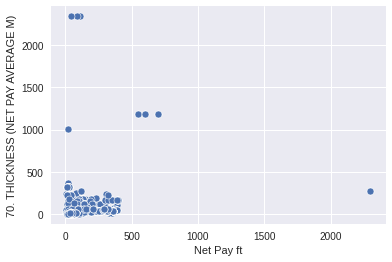

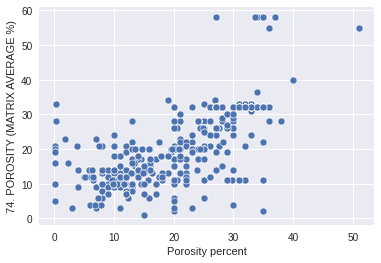

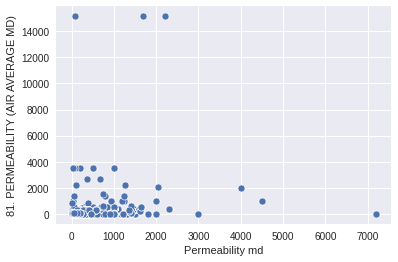

In [56]:
plt.figure()
g = sns.scatterplot(data=df_dup, x="Net Pay ft", y="70. THICKNESS (NET PAY AVERAGE M)")

plt.figure()
g = sns.scatterplot(data=df_dup, x="Porosity percent", y="74. POROSITY (MATRIX AVERAGE %)")

plt.figure()
g = sns.scatterplot(data=df_dup, x="Permeability md", y="81. PERMEABILITY (AIR AVERAGE MD)")

# De-duplicated datasets

In [ ]:
df = pd.concat(
    [pd.read_csv(f"../data_run/{d}.csv").assign(dataset=d) for d in ["CA", "TA", "TC", "TCA"]]
)

In [ ]:
sns.boxenplot(data=df, x="API GRAVITY (AVERAGE DEG API)", y="dataset")